In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv(r'\Users\CLAUDIA\Ironhack\Week2\mtcars.csv')

In [3]:
data.head()
# 1. hypothesis : MPG is ‘driven’ by horsepower 
#(sub hypothesis … and is not affected by # cylinders)
# 2. visualise it with seaborn / matplotlib
# 3. share your code via slack or notebook on our class repo as plot_yourname_date

,Model,MPG,Cylinders,Displacement,Horsepower,Rear_Axle_Ratio,Weight (000),Qtr_Mile_Time,Engine_Shape,Transmission,Fwd_Gears,Carburators
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
data.shape

(32, 12)

In [5]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Rear_Axle_Ratio,Weight (000),Qtr_Mile_Time,Engine_Shape,Transmission,Fwd_Gears,Carburators
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            32 non-null     object 
 1   MPG              32 non-null     float64
 2   Cylinders        32 non-null     int64  
 3   Displacement     32 non-null     float64
 4   Horsepower       32 non-null     int64  
 5   Rear_Axle_Ratio  32 non-null     float64
 6   Weight (000)     32 non-null     float64
 7   Qtr_Mile_Time    32 non-null     float64
 8   Engine_Shape     32 non-null     int64  
 9   Transmission     32 non-null     int64  
 10  Fwd_Gears        32 non-null     int64  
 11  Carburators      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


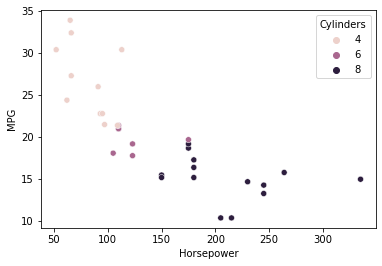

In [23]:
sns.scatterplot(data=data, x="Horsepower", y="MPG", hue="Cylinders");
#the correlation between the horsepower and the MPG is negative: the higher is the horsepower the lower is the MPG. 
#On top of that we also have a subcorrelation between MPG and Cylinders, where the higher is the MPG, the lower the Cylinders

In [16]:
import scipy.stats as stats

In [19]:
numeric=data.drop(['Model'], axis=1)

In [20]:
corr_matrix=numeric.corr()
corr_matrix

,MPG,Cylinders,Displacement,Horsepower,Rear_Axle_Ratio,Weight (000),Qtr_Mile_Time,Engine_Shape,Transmission,Fwd_Gears,Carburators
MPG,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
Cylinders,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
Displacement,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
Horsepower,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
Rear_Axle_Ratio,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
Weight (000),-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
Qtr_Mile_Time,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
Engine_Shape,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
Transmission,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
Fwd_Gears,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


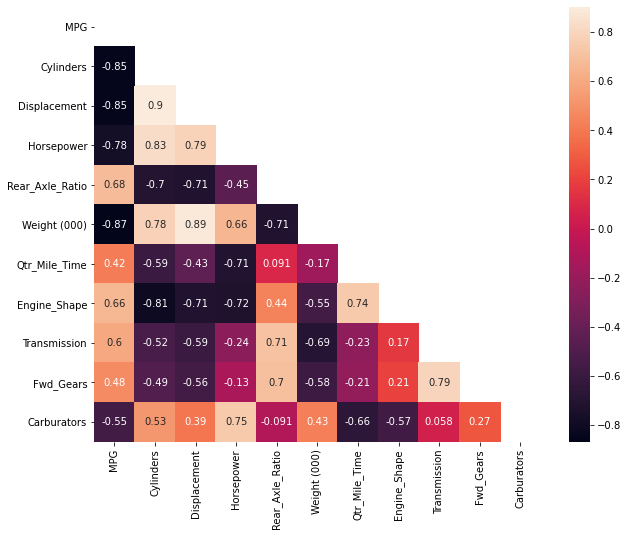

In [21]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()